In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
all_data = pd.read_csv("data/all_data_m.csv")

In [3]:
all_data.iloc[5]

time                                                      2021-01-02
time.1                                                             6
tweetl_t           @StickmanSham @RANK10YGO &gt;Crack a Silly “Hm...
mentions_t                                                    [][][]
replies_count_t                                                 20.0
                                         ...                        
open                                                        0.006985
high                                                        0.007366
low                                                         0.006975
tv                                                                 1
Volume                                                    41947109.0
Name: 5, Length: 417, dtype: object

In [4]:
all_data["tv"].value_counts()

-1    1219
 1    1217
 0     362
Name: tv, dtype: int64

In [5]:
all_data_num = all_data.drop(["tweetl_t", "tweetl_l", "mentions_t", "mentions_l"], axis=1)

In [6]:
all_data_num

,time,time.1,replies_count_t,retweets_count_t,top_tw_t,likes_count_t,dogecoin_t,dogearmy_t,elonmusk_t,buy_t,...,ladybug_l,already_l,gt_l,subj_l,polar_l,open,high,low,tv,Volume
0,2021-01-02,1,61.0,173.0,2.0,1631.0,0.0,0.0,0.0,0.0,...,0,0,1,0.248972,0.035800,0.006921,0.007172,0.006709,-1,29383228.0
1,2021-01-02,2,26.0,23.0,2.0,271.0,0.0,0.0,0.0,0.0,...,0,0,0,0.262869,0.106507,0.006767,0.007038,0.006641,0,41415520.0
2,2021-01-02,3,22.0,160.0,2.0,866.0,1.0,0.0,0.0,0.0,...,0,0,1,0.316667,0.136352,0.006780,0.007179,0.006745,1,31058927.0
3,2021-01-02,4,268.0,555.0,5.0,1868.0,1.0,0.0,0.0,4.0,...,0,3,0,0.279962,0.081136,0.007065,0.007421,0.007055,1,31100758.0
4,2021-01-02,5,35.0,252.0,2.0,1762.0,1.0,0.0,0.0,0.0,...,0,1,0,0.314670,0.147348,0.007308,0.007315,0.006738,-1,57350444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,2021-04-28,19,78.0,431.0,7.0,2989.0,3.0,1.0,1.0,0.0,...,6,1,0,0.329047,0.127826,0.316070,0.318500,0.310220,1,19257761.8
2794,2021-04-28,20,499.0,766.0,5.0,1751.0,1.0,0.0,0.0,0.0,...,4,2,0,0.306651,0.138017,0.317420,0.322030,0.314180,1,22698952.2
2795,2021-04-28,21,57.0,316.0,3.0,871.0,0.0,0.0,0.0,0.0,...,5,0,0,0.351950,0.142881,0.318320,0.325380,0.317000,1,22205970.7
2796,2021-04-28,22,1174.0,2506.0,5.0,11779.0,1.0,0.0,0.0,2.0,...,1,1,0,0.315244,0.118175,0.322610,0.322640,0.312610,-1,23157805.9


In [7]:
all_data_num = all_data_num.iloc[:,2:-1].apply(pd.to_numeric)

In [8]:
X = all_data_num.drop(columns='tv')
y = all_data_num['tv']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['tv'])
y_test  = pd.DataFrame(y_test, columns =['tv'])

In [10]:
y_train["tv"].value_counts()

-1    853
 1    849
 0    256
Name: tv, dtype: int64

<AxesSubplot:xlabel='tv', ylabel='count'>

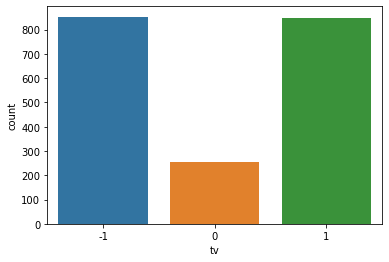

In [11]:
sns.countplot(x=y_train['tv'])

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y.value_counts()

-1    1219
 1    1217
 0     362
Name: tv, dtype: int64

In [13]:
#checking features with high importancy
from sklearn.feature_selection import RFE
data_final_vars = all_data_num.columns.values.tolist()
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(X_sm, y_sm.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [14]:
#droping features selected by RFE
boolencolm = rfe.support_
X_sm = pd.DataFrame(X_sm).loc[:, boolencolm]
X_test = pd.DataFrame(X_test).loc[:, boolencolm]

In [15]:
X_sm.head()

,replies_count_t,retweets_count_t,likes_count_t,subj_t,polar_t,replies_count_l,retweets_count_l,likes_count_l,dogecoin_l,elonmusk_l,buy_l,btc_l,eth_l,bitcoin_l,coin_l,subj_l,polar_l,open,high,low
0,950.0,939.0,6316.0,0.183333,0.100000,61.0,402.0,1153.0,62,16,14,11,10,8,5,0.267342,0.117813,0.056686,0.056944,0.055306
1,21.0,111.0,1036.0,0.225000,0.175000,129.0,428.0,1238.0,33,11,6,13,12,4,4,0.351542,0.190650,0.054068,0.054254,0.054017
2,12.0,64.0,220.0,0.000000,0.000000,20.0,64.0,204.0,20,3,1,0,0,0,0,0.361863,0.050261,0.009300,0.009570,0.009278
3,0.0,0.0,0.0,0.000000,0.000000,42.0,124.0,270.0,30,3,5,11,6,9,5,0.342627,0.129520,0.008849,0.009410,0.008632
4,162.0,338.0,1633.0,0.301687,-0.065675,128.0,274.0,986.0,37,7,14,14,17,11,4,0.353652,0.105273,0.053330,0.053914,0.052975


In [16]:

nb = CategoricalNB()
rfc = RandomForestClassifier()

nb.fit(X_sm, y_sm['tv'])
rfc.fit(X_sm, y_sm['tv'])

RandomForestClassifier()

In [17]:
y_train_res_pred_rf = rfc.predict(X_sm)
y_test_pred_rf      = rfc.predict(X_test)

In [18]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


In [19]:
model_performance_class(y_sm, y_train_res_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       853
           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       853

    accuracy                           1.00      2559
   macro avg       1.00      1.00      1.00      2559
weighted avg       1.00      1.00      1.00      2559

Results obtained for the TEST SET
The Cohen's Kappa is: 0.08
              precision    recall  f1-score   support

          -1       0.48      0.47      0.48       366
           0       0.20      0.29      0.23       106
           1       0.47      0.42      0.44       368

    accuracy                           0.43       840
   macro avg       0.38      0.39      0.39       840
weighted avg       0.44      0.43      0.43       840



In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500, 1000],
    'min_samples_split': [2, 4 , 6],
    'min_samples_leaf' : [1, 2 , 3],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [28]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [31]:
grid_search.fit(X_sm, y_sm.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 500, 1000]},
             return_train_score=True)

In [30]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [24]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.265384,0.085559,0.047126,0.006619,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.550781,...,0.566237,0.018432,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.985762,0.157731,0.057089,0.006891,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.562500,...,0.581086,0.020391,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,9.126612,0.205184,0.309728,0.102502,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.566406,...,0.585782,0.024813,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.822603,0.018539,0.029312,0.004440,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.554688,...,0.563498,0.021493,12,1.000000,1.000000,1.000000,1.000000,0.999512,0.999902,0.000195
4,1.635616,0.042431,0.063027,0.006854,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.541016,...,0.570537,0.027463,4,1.000000,1.000000,1.000000,1.000000,0.999512,0.999902,0.000195
5,11.513081,0.698308,0.522504,0.279737,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.546875,...,0.586174,0.028800,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,1.541470,0.560018,0.027211,0.003608,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.570312,...,0.567025,0.022880,7,0.998534,0.999023,0.998046,0.999023,0.997559,0.998437,0.000569
7,2.120772,0.473560,0.084845,0.051822,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.564453,...,0.567017,0.017482,9,0.999511,0.999511,0.999023,0.999511,0.999023,0.999316,0.000239
8,8.371441,0.101787,0.268571,0.012377,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.537109,...,0.568973,0.023696,5,1.000000,0.999511,0.999023,1.000000,1.000000,0.999707,0.000391
9,0.940499,0.070596,0.028243,0.003875,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.570312,...,0.567025,0.022880,7,0.998534,0.999023,0.998046,0.999023,0.997559,0.998437,0.000569


In [32]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=4, n_estimators=500)
cross_val_scores = cross_val_score(clf, X_train, y_train.values.ravel() , cv=10)
print(np.mean(cross_val_scores))

0.4320460491889063
